<h1>PRODIGY Data Science Task 5</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("US_Accidents.csv")


In [6]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),...,Amenity,Crossing,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,"Wednesday, December 15, 2021","Wednesday, December 15, 2021",43.035732,-87.934173,0.290,Milwaukee,Milwaukee,WI,49,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,"Wednesday, December 15, 2021","Wednesday, December 15, 2021",33.354181,-86.779664,0.907,Birmingham,Shelby,AL,51,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,"Wednesday, December 15, 2021","Thursday, December 16, 2021",30.269318,-81.612163,0.588,Jacksonville,Duval,FL,65,...,False,False,True,False,False,False,Night,Night,Night,Night
3,2,"Wednesday, December 15, 2021","Wednesday, December 15, 2021",32.756081,-96.837397,0.025,Dallas,Dallas,TX,67,...,False,False,False,False,False,False,Night,Night,Night,Night
4,2,"Wednesday, December 15, 2021","Wednesday, December 15, 2021",33.899199,-81.220086,0.017,Lexington,Lexington,SC,36,...,False,False,False,False,False,False,Night,Night,Night,Night


In [7]:
df.tail()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),...,Amenity,Crossing,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
95932,2,"Thursday, December 30, 2021","Friday, December 31, 2021",33.774365,-118.096021,0.213,Seal Beach,Orange,CA,48,...,False,False,False,False,False,False,Night,Night,Night,Night
95933,2,"Thursday, December 30, 2021","Friday, December 31, 2021",29.994918,-90.119293,0.190,New Orleans,Orleans,LA,75,...,False,False,False,False,False,False,Night,Night,Night,Night
95934,2,"Thursday, December 30, 2021","Friday, December 31, 2021",29.959137,-90.060664,0.041,New Orleans,Orleans,LA,75,...,True,False,False,False,False,True,Night,Night,Night,Night
95935,2,"Friday, December 31, 2021","Friday, December 31, 2021",40.082427,-75.409137,0.287,Wayne,Chester,PA,48,...,False,False,False,False,False,False,Night,Night,Night,Night
95936,4,"Friday, December 31, 2021","Friday, December 31, 2021",32.794865,-88.033608,8.722,Boligee,Greene,AL,62,...,False,False,False,False,False,False,Night,Night,Night,Night


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95937 entries, 0 to 95936
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               95937 non-null  int64  
 1   Start_Time             95937 non-null  object 
 2   End_Time               95937 non-null  object 
 3   Start_Lat              95937 non-null  float64
 4   Start_Lng              95937 non-null  float64
 5   Distance(mi)           95937 non-null  float64
 6   City                   95937 non-null  object 
 7   County                 95937 non-null  object 
 8   State                  95937 non-null  object 
 9   Temperature(F)         95937 non-null  int64  
 10  Visibility(mi)         95937 non-null  float64
 11  Wind_Speed(mph)        95937 non-null  int64  
 12  Weather_Condition      95937 non-null  object 
 13  Amenity                95937 non-null  bool   
 14  Crossing               95937 non-null  bool   
 15  Ju

In [9]:
df.shape

(95937, 23)

In [10]:
df.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
City                     0
County                   0
State                    0
Temperature(F)           0
Visibility(mi)           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Crossing                 0
Junction                 0
Station                  0
Stop                     0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [11]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Temperature(F)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
# Convert 'Start_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour, day, month, and year from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

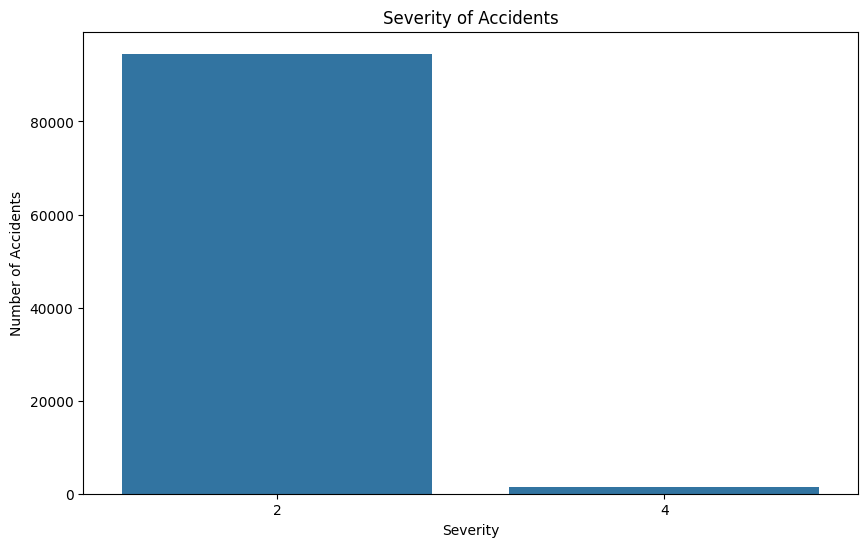

In [27]:
# Analyze severity of accidents
severity = df['Severity'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=severity.index, y=severity.values)
plt.title('Severity of Accidents')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()


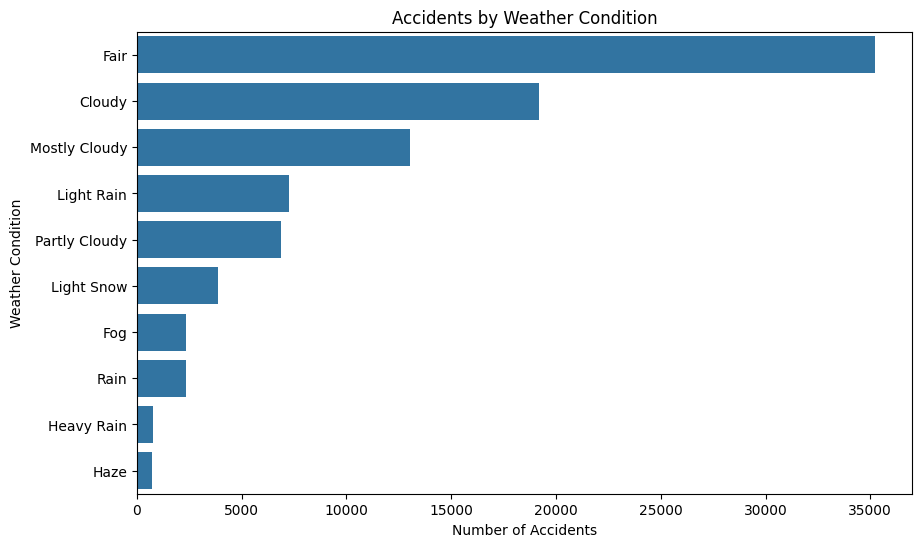

In [19]:
# Group by 'Weather_Condition' and calculate the number of accidents
weather_conditions = df['Weather_Condition'].value_counts().head(10)  # Top 10 conditions for clarity

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions.values, y=weather_conditions.index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()


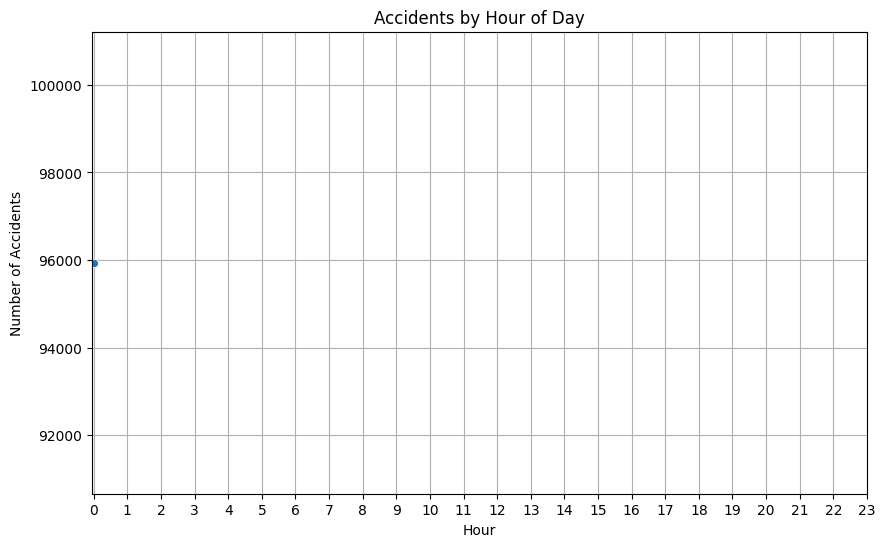

In [20]:
# Group by 'Hour' and calculate the number of accidents
hourly_accidents = df['Hour'].value_counts().sort_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid()
plt.show()

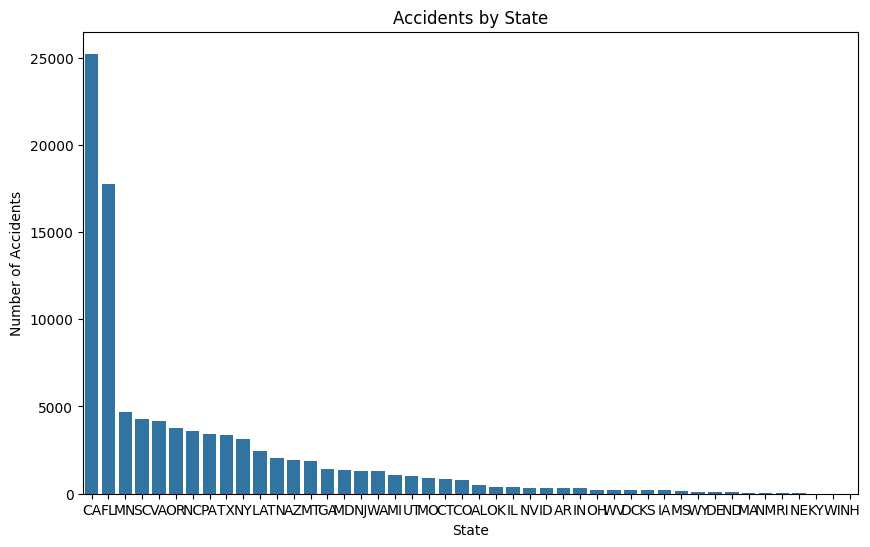

In [29]:
# Analyze accidents by state
state_accidents = df['State'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=state_accidents.index, y=state_accidents.values)
plt.title('Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()


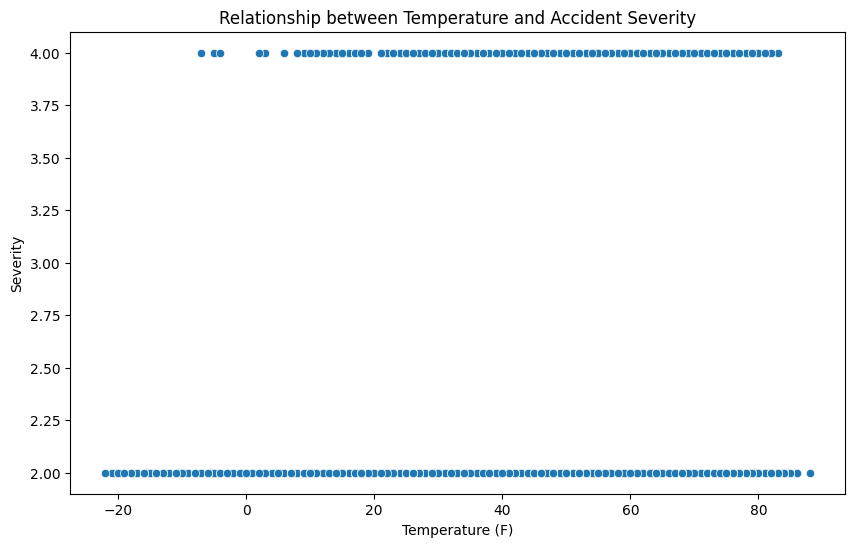

In [30]:
# Analyze relationship between temperature and accidents
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Temperature(F)'], y=df['Severity'])
plt.title('Relationship between Temperature and Accident Severity')
plt.xlabel('Temperature (F)')
plt.ylabel('Severity')
plt.show()

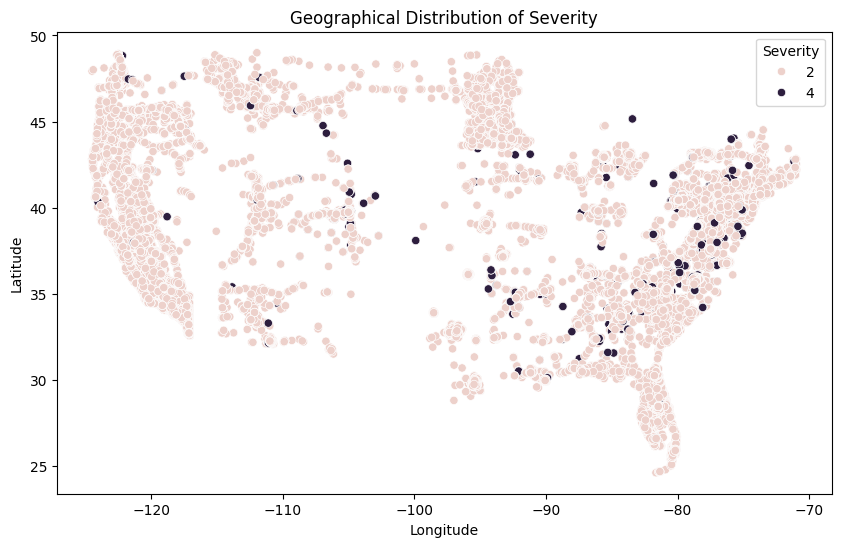

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df)
plt.title('Geographical Distribution of Severity')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Severity")
plt.show()